In [1]:
import cv2
import math
import numpy as np
import  pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')

In [2]:
def showImgs(imgs, n_imgs, i_imgs):
   n = sqrt(n_imgs)
   m = n
   p = 1
   if n != int(n):
      n = int(n)
      m = n + 1
   print("n, m", n, m)
   fig = plt.figure()
   for i in i_imgs:
      fig.add_subplot(int(n), int(m), p)
      plt.imshow(imgs[i], cmap='gray')
      plt.axis('off')
      p += 1
plt.show()

n, m 10.0 10.0


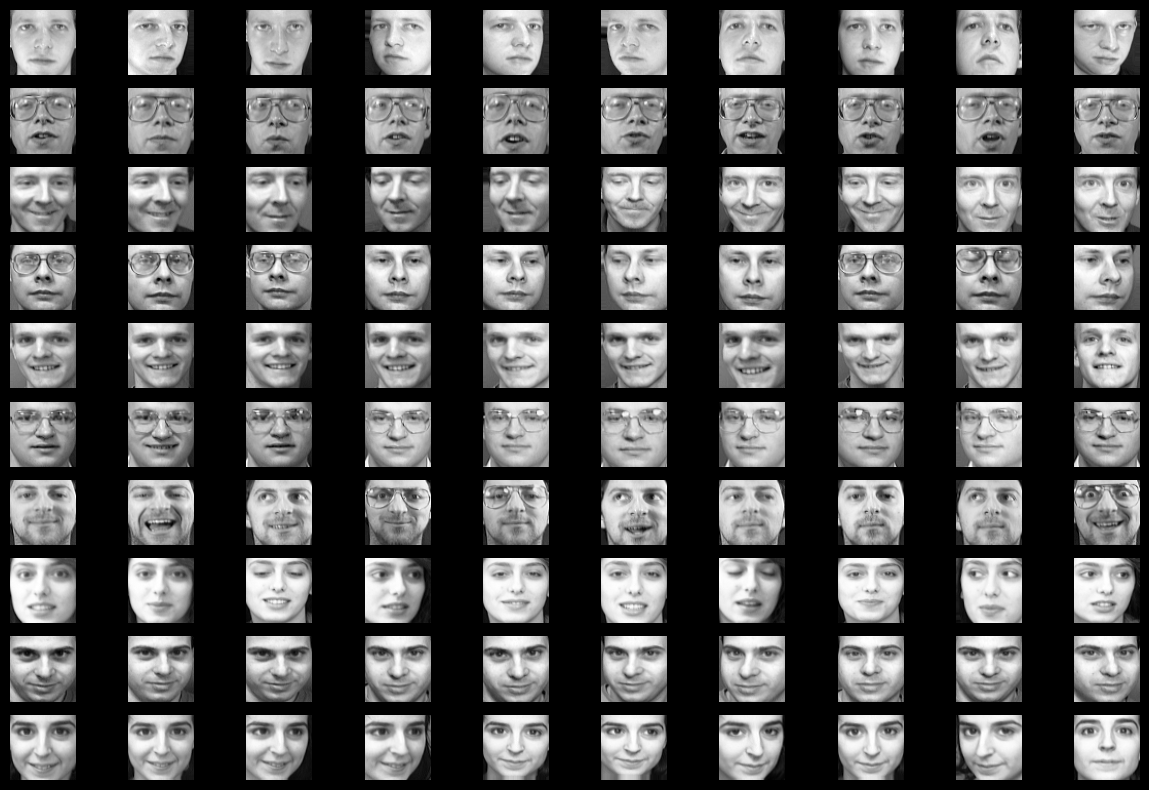

In [3]:
faces = fetch_olivetti_faces()
images = faces.images
images.shape

features = faces.data  # features
targets = faces.target # targets
showImgs(images, 100, range(100))

the target of this face is : 7
n, m 1.0 1.0


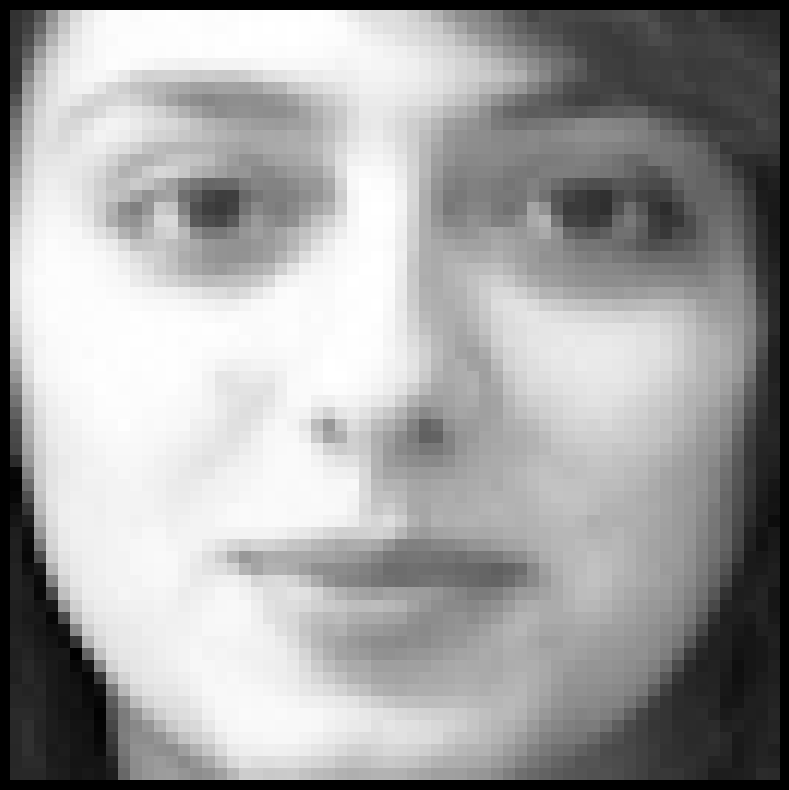

In [4]:
query_img1 = images[71]
print('the target of this face is :', targets[71])
showImgs([query_img1], 1, [0])

n, m 3 4


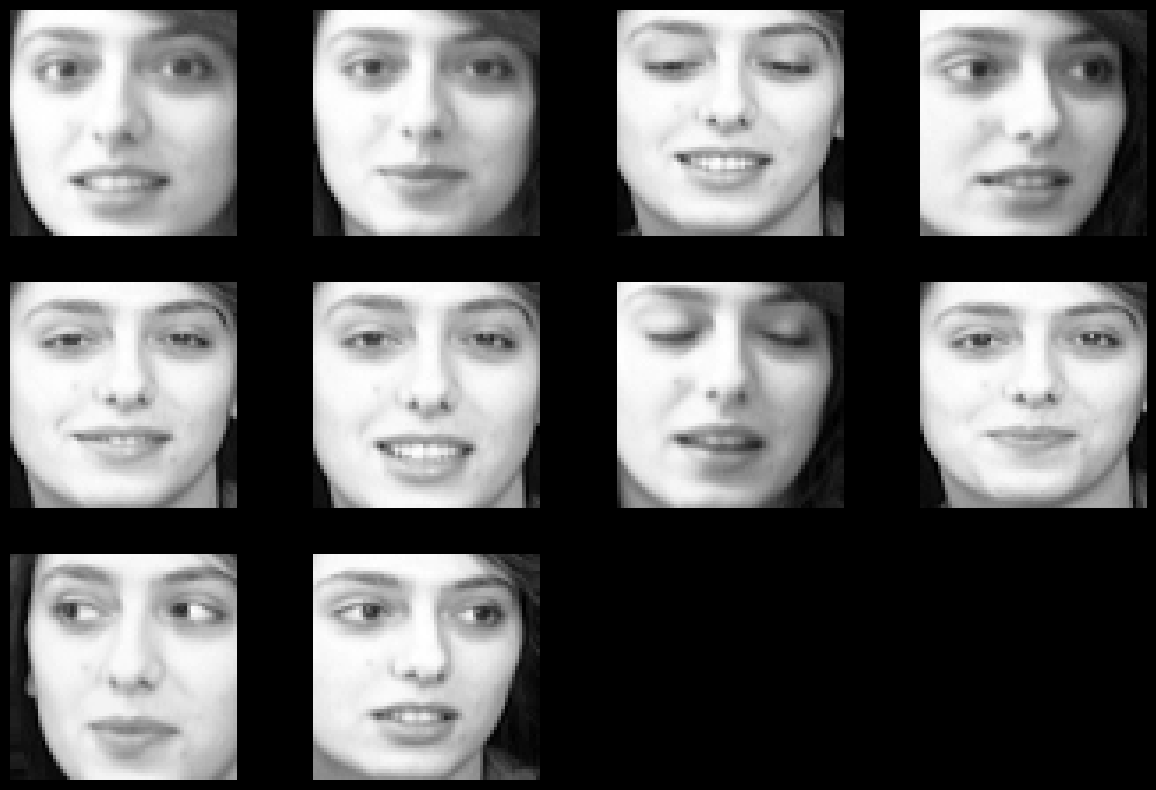

In [5]:
showImgs(images, 10, range(70, 80))

n, m 1.0 1.0


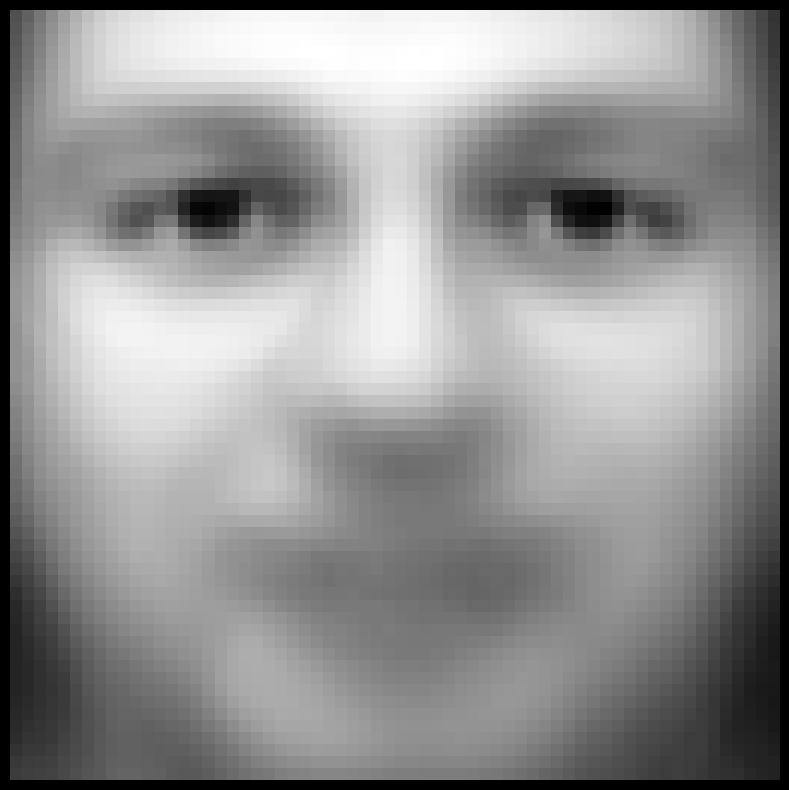

In [6]:
query_γ1 = query_img1.reshape(-1)
Γ = np.array([I.reshape(-1) for I in images])
Σ_Γi = np.zeros(4096)
for Γi in Γ:
   Σ_Γi += Γi
   Ψ = (1/400)* Σ_Γi
showImgs([Ψ.reshape(64,64)], 1, [0])

In [7]:
φ1 = query_γ1 - Ψ
Φ = np.array([I - Ψ for I in Γ])
Φ.shape

(400, 4096)

In [8]:
# Using the PCA algorithm
pca = PCA(svd_solver='full')

In [9]:
# These lines just for showing the images in (64, 64)format
best_eigenfaces = []
for eigenface in pca.components_[0 : 40]:
   best_eigenfaces.append(eigenface.reshape(64, 64))
showImgs(best_eigenfaces, 40, range(40))

AttributeError: 'PCA' object has no attribute 'components_'

In [12]:
weights = []
for i in range(0, 400):
   weight = []
   for j in range(0, 40):
    w = best_eigenfaces[j] @ Φ[i]
   weight.append(w)
   weights.append(weight)
weights = np.transpose(weights)
weights.shape

IndexError: list index out of range

In [13]:
weight1 = best_eigenfaces @ φ1.T
list_dist1 = np.linalg.norm(weights - weight1.reshape(-1, 1), axis = 0)
df1 = pd.DataFrame(list_dist1, columns=['euc dist'])
df1 = df1.sort_values(by=['euc dist'])
showImgs(images, 49, df1.index[0 : 49])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4096 is different from 0)